In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd -q ..

/home/prat/miniconda3/envs/rp/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import lcpfn 
import numpy as np
from matplotlib import pyplot as plt

## Generate samples from LC prior

(0.0, 1.0)

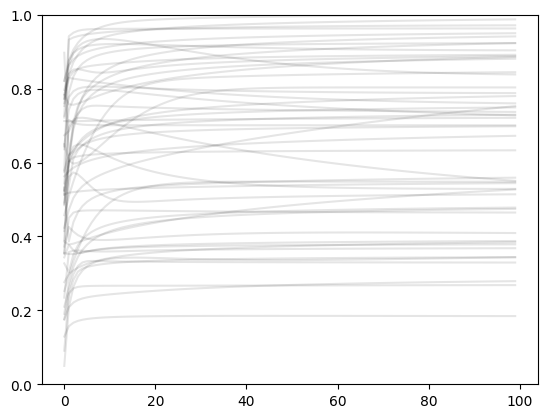

In [4]:
for _ in range(50):
    prior = lcpfn.sample_from_prior(np.random)
    curve, _ = prior()
    plt.plot(curve, "black", alpha=0.1)
plt.ylim(0, 1)

## Train a PFN model with the previous learning curve prior

In [5]:
get_batch_func = lcpfn.create_get_batch_func(prior=lcpfn.sample_from_prior)

In [6]:
# example of a batch

X, Y, Y_noisy = get_batch_func(batch_size=100, seq_len=100, num_features=1)
print(X.shape, Y.shape, Y_noisy.shape)

torch.Size([100, 100, 1]) torch.Size([100, 100]) torch.Size([100, 100])


In [7]:
# Main function to train a PFN model

lcpfn.train_lcpfn

<function lcpfn.train_lcpfn.train_lcpfn(get_batch_func, seq_len: int = 100, emsize: int = 512, nlayers: int = 12, num_borders: int = 1000, lr: float = 0.001, batch_size: int = 100, epochs: int = 1000)>

In [8]:
# train a small model for 3 epochs

result = lcpfn.train_lcpfn(get_batch_func=get_batch_func, 
                          seq_len=100,
                         emsize=256,
                         nlayers=3,
                         num_borders=1000,
                         lr=0.001,
                         batch_size=10,
                         epochs=3)

Using 1000000 y evals to estimate 1000 buckets. Cut off the last 0 ys.
Using cuda:0 device
init dist
Not using distributed
DataLoader.__dict__ {'num_steps': 100, 'get_batch_kwargs': {'batch_size': 10, 'eval_pos_seq_len_sampler': <function train.<locals>.eval_pos_seq_len_sampler at 0x7f6c3f8dd670>, 'seq_len_maximum': 100, 'device': 'cuda:0', 'num_features': 1, 'hyperparameters': {}}, 'num_features': 1}


KeyboardInterrupt: 

In [ ]:
# Get the trained model

model = result[2]
print(model)